<a href="https://colab.research.google.com/github/samehaisaa/ML-Journey/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler


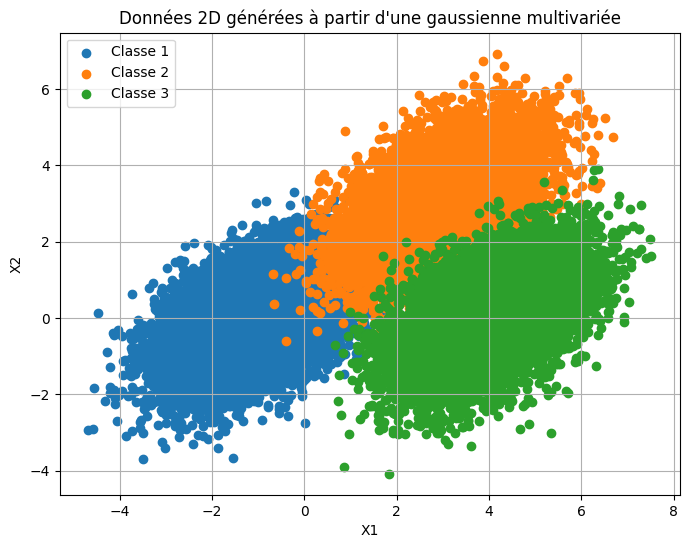

In [2]:

n_classes = 3
n_samples_per_class = 10000

means = [np.array([-1, 0]), np.array([3, 3]), np.array([4, 0])]
cov = np.array([[1, 0.5], [0.5, 1]])

X = []
y = []
for i in range(n_classes):
    class_data = np.random.multivariate_normal(means[i], cov, n_samples_per_class)
    X.append(class_data)
    y.append(np.full(n_samples_per_class, i))

X = np.vstack(X)
y = np.hstack(y)

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.scatter(X[y == i][:, 0], X[y == i][:, 1], label=f'Classe {i + 1}')
plt.title("Données 2D générées à partir d'une gaussienne multivariée")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid()
plt.show()


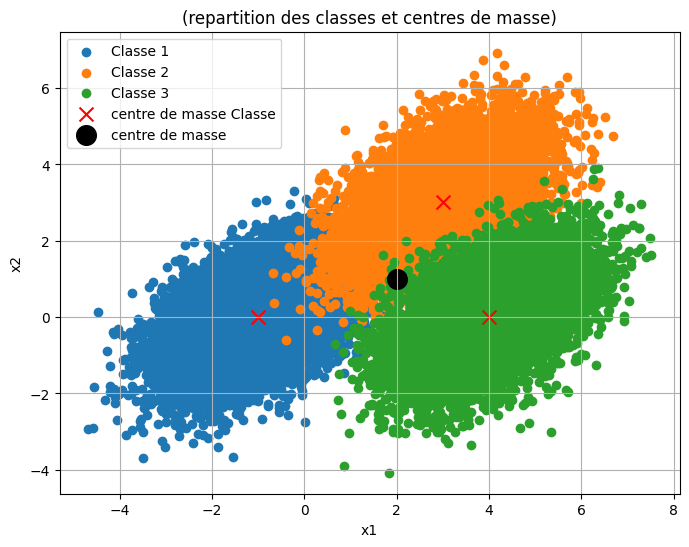

In [3]:
centroids = []
overall_centroid = np.mean(X, axis=0)

for i in range(n_classes):
    centroid = np.mean(X[y == i], axis=0)
    centroids.append(centroid)

centroids = np.array(centroids)

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.scatter(X[y == i][:, 0], X[y == i][:, 1], label=f'Classe {i + 1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='centre de masse Classe')
plt.scatter(overall_centroid[0], overall_centroid[1], color='black', marker='o', s=200, label='centre de masse')
plt.title("(repartition des classes et centres de masse)")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()
plt.show()


In [4]:
def within_class_scatter(X, y, centroids):
    Sw = np.zeros((X.shape[1], X.shape[1]))
    for i in range(n_classes):
        class_scatter = np.zeros((X.shape[1], X.shape[1]))
        for row in X[y == i]:
            row, mean = row.reshape(X.shape[1], 1), centroids[i].reshape(X.shape[1], 1)
            class_scatter += (row - mean).dot((row - mean).T)
        Sw += class_scatter
    return Sw

Sw = within_class_scatter(X, y, centroids)


In [5]:
def between_class_scatter(centroids, overall_centroid, n_samples):
    Sb = np.zeros((centroids.shape[1], centroids.shape[1]))
    for i in range(n_classes):
        n = np.sum(y == i)
        mean = centroids[i].reshape(centroids.shape[1], 1)
        overall_mean = overall_centroid.reshape(overall_centroid.shape[0], 1)
        Sb += n * (mean - overall_mean).dot((mean - overall_mean).T)
    return Sb

Sb = between_class_scatter(centroids, overall_centroid, X.shape[0])


In [6]:
print("Matrice de dispersion intra-classe  (S_w):")
print(np.round(Sw,1))
print("Shape of S_w:", Sw.shape)
print("\Matrice de dispersion entre les classes (S_b):")
print(np.round(Sb,1))
print("Shape of S_b:", Sb.shape)

print("Les points :")
#print(np.round(X,1))
print("\Shape of data matrix:", X.shape)


Matrice de dispersion intra-classe  (S_w):
[[29848.7 14796. ]
 [14796.  30086.3]]
Shape of S_w: (2, 2)
\Matrice de dispersion entre les classes (S_b):
[[139880.7  29880.4]
 [ 29880.4  60096.5]]
Shape of S_b: (2, 2)
Les points :
\Shape of data matrix: (30000, 2)


In [7]:
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

sorted_indices = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]


In [8]:
print("Eigenvalues:")
print(np.round(eigvals,1))
print("\nEigenvectors:")
print(np.round(eigvecs,1))

Eigenvalues:
[5.5 2. ]

Eigenvectors:
[[ 0.9 -0. ]
 [-0.4  1. ]]


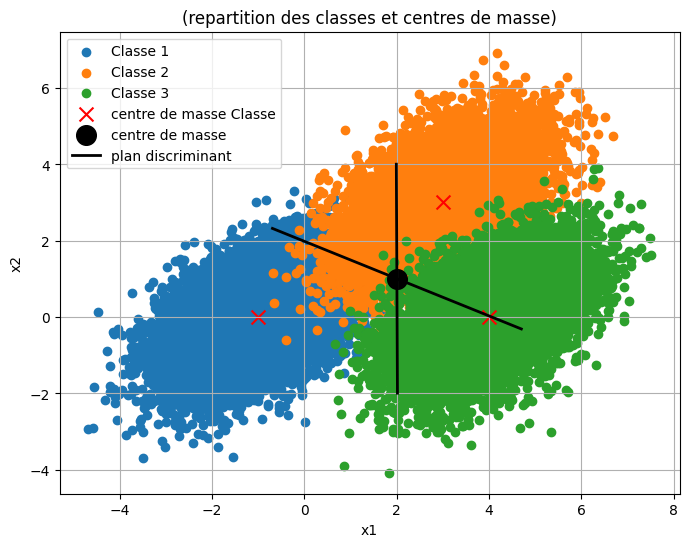

In [9]:
centroids = []
overall_centroid = np.mean(X, axis=0)

for i in range(n_classes):
    centroid = np.mean(X[y == i], axis=0)
    centroids.append(centroid)

centroids = np.array(centroids)

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.scatter(X[y == i][:, 0], X[y == i][:, 1], label=f'Classe {i + 1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='centre de masse Classe')
plt.scatter(overall_centroid[0], overall_centroid[1], color='black', marker='o', s=200, label='centre de masse')
plt.title("(repartition des classes et centres de masse)")
lda_direction = eigvecs[:, np.argmax(eigvals)]
lda_direction2 = eigvecs[:, np.argmin(eigvals)]


point1 = overall_centroid - 3 * lda_direction
point2 = overall_centroid + 3 * lda_direction
point3 = overall_centroid - 3 * lda_direction2
point4 = overall_centroid + 3 * lda_direction2

plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', lw=2, label='plan discriminant')
plt.plot([point3[0], point4[0]], [point3[1], point4[1]], color='black', lw=2)

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()
plt.show()


In [10]:
k = 1
W = eigvecs[:, :k]

X_lda_1d = X.dot(W)

X_lda_1d = X_lda_1d.flatten()


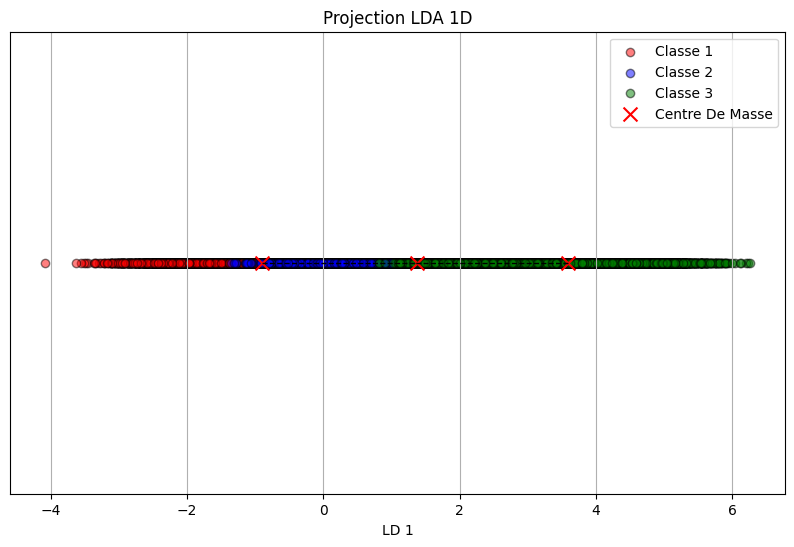

In [11]:
colors = ['red', 'blue', 'green']

new_centroids_1d = np.dot(centroids, W).flatten()

new_overall_centroid_1d = np.mean(X_lda_1d)

plt.figure(figsize=(10, 6))

for i in range(n_classes):
    plt.scatter(X_lda_1d[y == i], np.zeros_like(X_lda_1d[y == i]),
                alpha=0.5, edgecolors='k', label=f'Classe {i + 1}', color=colors[i])

plt.scatter(new_centroids_1d, np.zeros_like(new_centroids_1d), color='red', marker='x', s=100, label='Centre De Masse')

for i in range(n_classes):
    plt.plot([new_centroids_1d[i], new_overall_centroid_1d], [0, 0], 'k--', linewidth=1)

plt.title("Projection LDA 1D")
plt.xlabel("LD 1")
plt.yticks([])
plt.legend()
plt.grid()
plt.show()


In [12]:
bins = np.sqrt(n_samples_per_class * n_classes)

The predicted class for the sample 2 is: Class 2


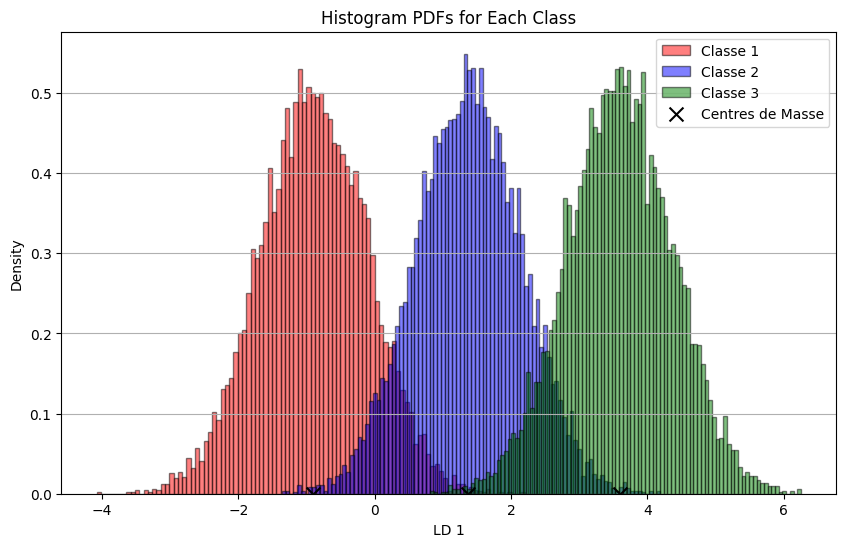

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

n_classes = len(np.unique(y))

def estimate_histogram_pdf(X, bins=30):
    hist, bin_edges = np.histogram(X, bins=bins, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    return bin_centers, hist

def calculate_priors(y):
    priors = np.zeros(n_classes)
    for i in range(n_classes):
        priors[i] = np.sum(y == i) / len(y)
    return priors

class_pdfs = []
bin_centers_list = []

for i in range(n_classes):
    X_class_i = X_lda_1d[y == i]

    bin_centers, pdf = estimate_histogram_pdf(X_class_i, bins=n_samples_per_class)
    class_pdfs.append(pdf)
    bin_centers_list.append(bin_centers)

priors = calculate_priors(y)

def predict(X_new, class_pdfs, bin_centers_list, priors):
    posteriors = np.zeros(n_classes)

    for i in range(n_classes):
        likelihood = np.interp(X_new, bin_centers_list[i], class_pdfs[i], left=0, right=0)

        posteriors[i] = likelihood * priors[i]

    posteriors /= np.sum(posteriors)

    return np.argmax(posteriors)

X_new = 2
predicted_class = predict(X_new, class_pdfs, bin_centers_list, priors)

print(f"The predicted class for the sample {X_new} is: Class {predicted_class + 1}")

plt.figure(figsize=(10, 6))

for i in range(n_classes):
    plt.hist(X_lda_1d[y == i], bins=100, alpha=0.5, color=colors[i], edgecolor='k',
             label=f'Classe {i + 1}', density=True)

plt.scatter(new_centroids_1d, np.zeros_like(new_centroids_1d), color='black', marker='x',
            s=100, label='Centres de Masse')

plt.title("Histogram PDFs for Each Class")
plt.xlabel("LD 1")
plt.ylabel("Density")
plt.legend()
plt.grid(axis='y')
plt.show()


The predicted class for the sample 2 is: Class 2


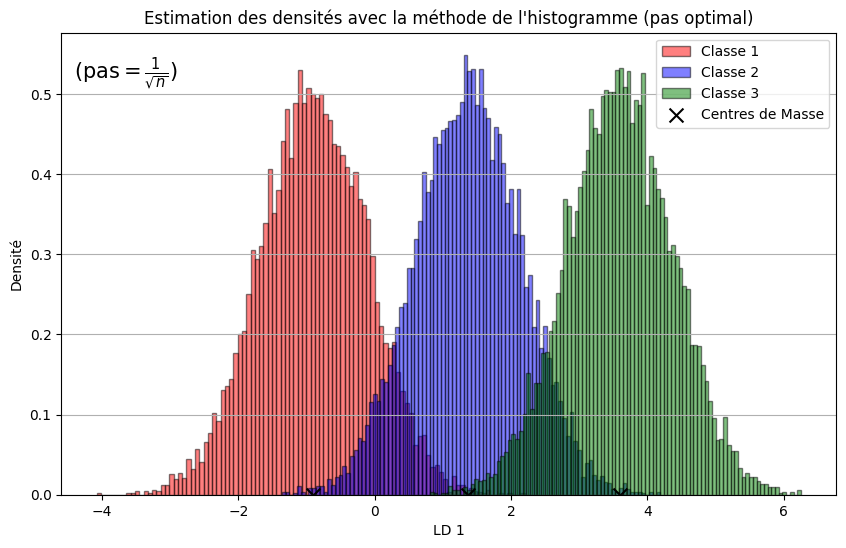

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

n_classes = len(np.unique(y))

def estimate_histogram_pdf(X, bins=30):
    hist, bin_edges = np.histogram(X, bins=bins, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    return bin_centers, hist

def calculate_priors(y):
    priors = np.zeros(n_classes)
    for i in range(n_classes):
        priors[i] = np.sum(y == i) / len(y)
    return priors

class_pdfs = []
bin_centers_list = []

for i in range(n_classes):
    X_class_i = X_lda_1d[y == i]

    bin_centers, pdf = estimate_histogram_pdf(X_class_i, bins=int(np.sqrt(len(X_class_i))))
    class_pdfs.append(pdf)
    bin_centers_list.append(bin_centers)

priors = calculate_priors(y)

def predict(X_new, class_pdfs, bin_centers_list, priors):
    posteriors = np.zeros(n_classes)

    for i in range(n_classes):
        likelihood = np.interp(X_new, bin_centers_list[i], class_pdfs[i], left=0, right=0)
        posteriors[i] = likelihood * priors[i]

    posteriors /= np.sum(posteriors)
    return np.argmax(posteriors)

X_new = 2
predicted_class = predict(X_new, class_pdfs, bin_centers_list, priors)

print(f"The predicted class for the sample {X_new} is: Class {predicted_class + 1}")

plt.figure(figsize=(10, 6))

for i in range(n_classes):
    n_samples = len(X_lda_1d[y == i])
    plt.hist(X_lda_1d[y == i], bins=int(np.sqrt(n_samples)), alpha=0.5, color=colors[i], edgecolor='k',
             label=f'Classe {i + 1}', density=True)

plt.scatter(new_centroids_1d, np.zeros_like(new_centroids_1d), color='black', marker='x',
            s=100, label='Centres de Masse')

plt.title("Estimation des densités avec la méthode de l'histogramme (pas optimal)")
plt.xlabel("LD 1")
plt.ylabel("Densité")
plt.legend()
plt.grid(axis='y')

# Adding LaTeX label in the top-right corner
plt.text(0.15, 0.95, r'$(\mathrm{pas} = \frac{1}{\sqrt{n}})$', ha='right', va='top', transform=plt.gca().transAxes, fontsize=15)

plt.show()


<ipython-input-14-b79959832e27>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  posteriors[i] = likelihood * priors[i]


la classe prédite est 2 la: Classe 2


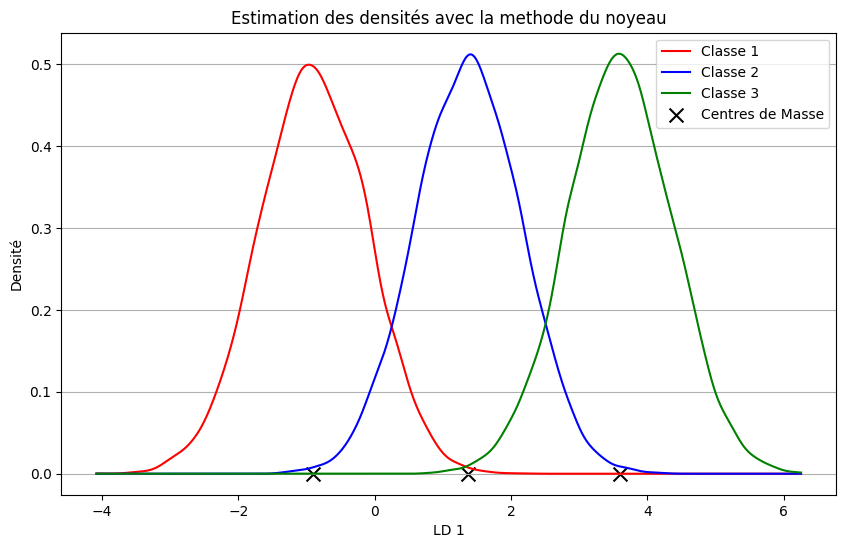

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

n_classes = len(np.unique(y))
def calculate_priors(y):
    priors = np.zeros(n_classes)
    for i in range(n_classes):
        priors[i] = np.sum(y == i) / len(y)
    return priors

def estimate_kde(X):
    kde = gaussian_kde(X)
    return kde

class_kdes = []
priors = calculate_priors(y)

for i in range(n_classes):
    X_class_i = X_lda_1d[y == i]

    kde = estimate_kde(X_class_i)
    class_kdes.append(kde)

def predict(X_new, class_kdes, priors):
    posteriors = np.zeros(n_classes)

    for i in range(n_classes):
        likelihood = class_kdes[i].evaluate(X_new)

        posteriors[i] = likelihood * priors[i]

    posteriors /= np.sum(posteriors)
    return np.argmax(posteriors)

X_new = 2
predicted_class = predict(X_new, class_kdes, priors)

print(f"la classe prédite est {X_new} la: Classe {predicted_class + 1}")

plt.figure(figsize=(10, 6))
x_range = np.linspace(np.min(X_lda_1d), np.max(X_lda_1d), 1000)
for i in range(n_classes):
    pdf = class_kdes[i].evaluate(x_range)
    plt.plot(x_range, pdf, label=f'Classe {i + 1} ', color=colors[i])

plt.scatter(new_centroids_1d, np.zeros_like(new_centroids_1d), color='black', marker='x',
            s=100, label='Centres de Masse')

plt.title("Estimation des densités avec la methode du noyeau")
plt.xlabel("LD 1")
plt.ylabel("Densité")
plt.legend()
plt.grid(axis='y')
plt.show()


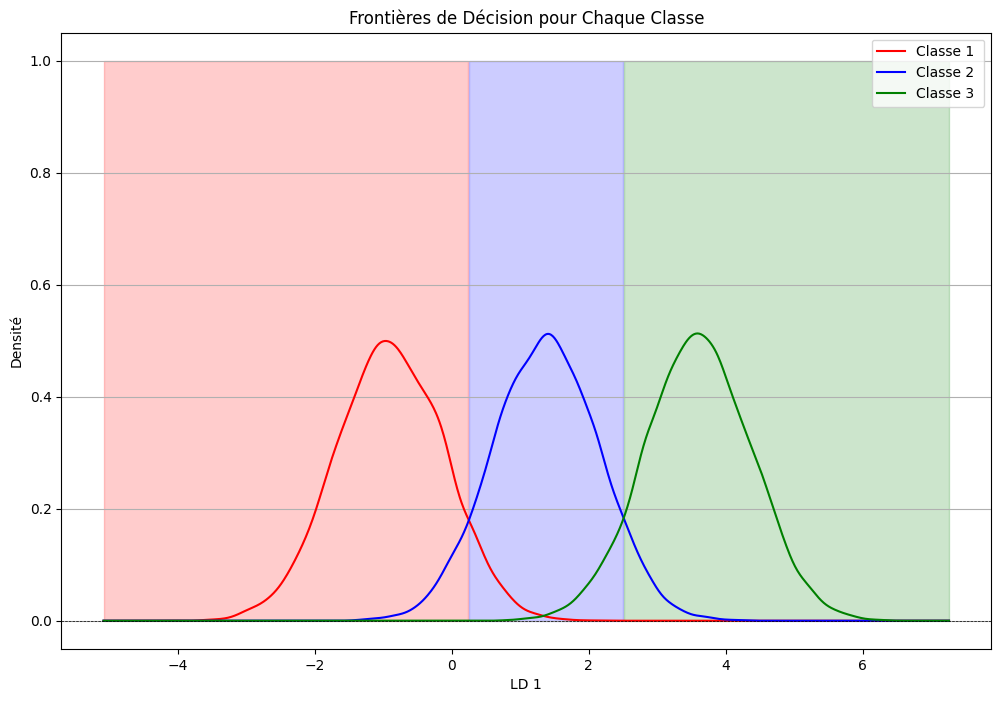

la classe prédite pour  2 la: Classe 2


<ipython-input-14-b79959832e27>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  posteriors[i] = likelihood * priors[i]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

n_classes = len(np.unique(y))

colors = ['red', 'blue', 'green', 'orange', 'purple']
def calculate_priors(y):
    priors = np.zeros(n_classes)
    for i in range(n_classes):
        priors[i] = np.sum(y == i) / len(y)
    return priors

def estimate_kde(X):
    kde = gaussian_kde(X)
    return kde

class_kdes = []
priors = calculate_priors(y)

for i in range(n_classes):
    X_class_i = X_lda_1d[y == i]

    kde = estimate_kde(X_class_i)
    class_kdes.append(kde)

x_range = np.linspace(np.min(X_lda_1d) - 1, np.max(X_lda_1d) + 1, 1000)
posteriors = np.zeros((len(x_range), n_classes))

for i in range(n_classes):
    likelihood = class_kdes[i].evaluate(x_range)
    posteriors[:, i] = likelihood * priors[i]

posteriors /= posteriors.sum(axis=1, keepdims=True)

predicted_classes = np.argmax(posteriors, axis=1)

plt.figure(figsize=(12, 8))

for i in range(n_classes):
    pdf = class_kdes[i].evaluate(x_range)
    plt.plot(x_range, pdf, label=f'Classe {i + 1} ', color=colors[i])

plt.fill_between(x_range, 0, 1, where=(predicted_classes == 0), color='red', alpha=0.2)
plt.fill_between(x_range, 0, 1, where=(predicted_classes == 1), color='blue', alpha=0.2)
plt.fill_between(x_range, 0, 1, where=(predicted_classes == 2), color='green', alpha=0.2)


plt.title("Frontières de Décision pour Chaque Classe")
plt.xlabel("LD 1")
plt.ylabel("Densité")
plt.legend()
plt.grid(axis='y')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.show()

X_new = 2
predicted_class = predict(X_new, class_kdes, priors)

print(f"la classe prédite pour  {X_new} la: Classe {predicted_class + 1}")
